# Reconocimiento Facial

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']


In [4]:
print(faces.images.shape)

(820, 62, 47)


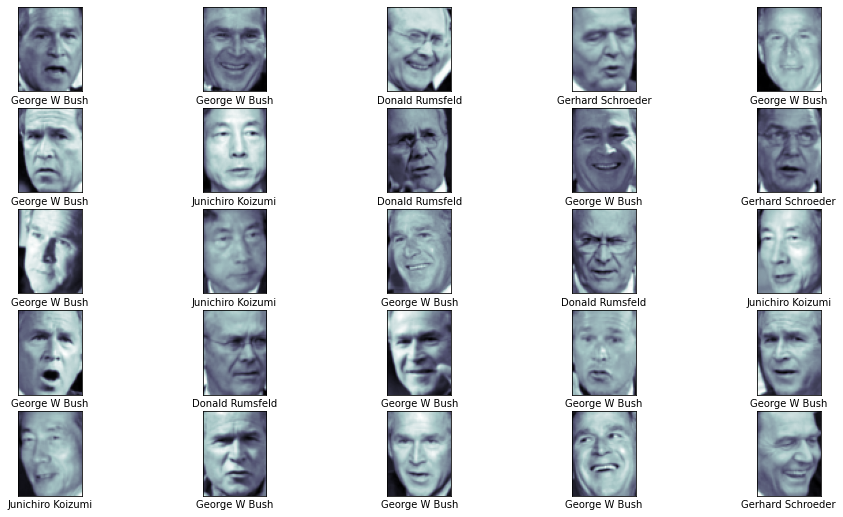

In [5]:
fig, ax= plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [7]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(faces.data, faces.target, random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)


In [ ]:
print(grid.best_params_)

In [ ]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

In [ ]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")

fig.suptitle("Predicciones de las imágnes (incorrectas en rojo)", size = 15)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

In [ ]:
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix


In [ ]:
mat = confusion_matrix(Ytest, yfit)

In [ ]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names )